## The very basics of plotting using Magics

[Magics defaults](#magics_defaults)   
#### Most important parameters:
[contour_level_selection_type = count](#contour_level_selection_type)  
[min/max parameters](#min_max_parameters)  
[contour_level_selection_type = interval](#contour_level_selection_type_interval)   
[contour_interpolation_ceiling & contour_interpolation_floor](#interpolation_ceiling_floor)  
[Shading](#shading)


In [1]:
import Magics.macro as magics
import xarray as xr

/usr/local/apps/python3/3.6.8-01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "europe"
)

coast = magics.mcoast()

legend = magics.mlegend(legend_display_type       = 'continuous',
                        legend_automatic_position = 'right')

### Loading the data
Just some basic meteorological variables. Magics will want to convert our simulated satellite image to Celsius, but right now I don't want it so that I'm turning automatic scalling off. 

In [3]:
# Some data we might want to plot
t       = magics.mgrib(grib_input_file_name = "data/t850.grib")
z       = magics.mgrib(grib_input_file_name = "data/z500.grib")
tp      = magics.mgrib(grib_input_file_name = "data/total_precipitation.grib")
sat_ir  = magics.mgrib(grib_input_file_name = "data/ssd.grib",
                      grib_automatic_scaling = "off")
ptype   = magics.mgrib(grib_input_file_name = "data/ptype.grib")
pl_data = magics.mgrib(grib_input_file_name = "data/pl_data.grib")
my_data = magics.mgrib(grib_input_file_name = 'data/fg_prob.grib')

In [4]:
ds = xr.open_dataset('data/pl_data.grib',engine='cfgrib')
ds_850 = ds.sel(isobaricInhPa  = 850)
ds_850

Ignoring index file '/home/ma/mamv/2020/magics_stuff/tutorial2020/data/pl_data.grib.011ab.idx' older than GRIB file


<xarray.Dataset>
Dimensions:        (latitude: 721, longitude: 1440)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  int64 850
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    r              (latitude, longitude) float32 ...
    t              (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-03-30T16:41:14 GRIB to CDM+CF via cfgrib-0....

In [5]:
rh = magics.mxarray(xarray_dataset = ds_850, 
                    xarray_variable_name = "r")

### Magics defaults <a id='magics_defaults'></a>
Magics default plot is just blue line, and with shading 'on' default is dot shading so frist default you will change most of the times are these parameters:
- contour_shade = 'on'
- contour_shade_method = 'area_fill'  

Other methods are 'dot' and 'hach' but you will almost never use them.  
Legend is off by default, so we need to add that too, so we see all the colours.

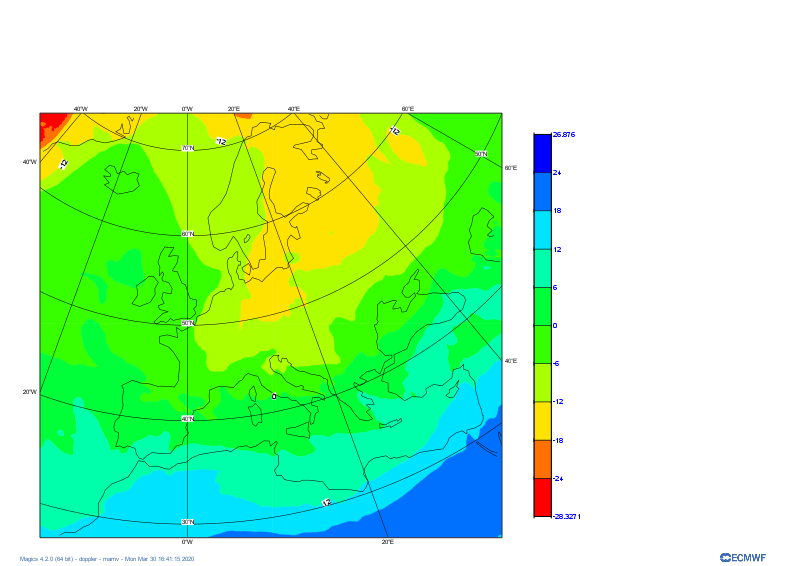

In [6]:
my_simple_contour = magics.mcont(
    legend               = "on",
    contour              = "off",
    contour_shade        = "on",
    contour_shade_method = "area_fill")
magics.plot(projection,t,my_simple_contour,coast,legend)

Bunch of defaults we can notice here: 
- 10 colours
- magics takes min and max from data and then finds 'nice' interval to distribute the 10 colours
- it starts from red and ends at blue

Main things Magics needs to know:  
- levels
- colours

These are handled separately and if they don't match you will get unexpected results.  
For example: Even though our colour list has 20 colours, we see only 10 because of the default number of levels

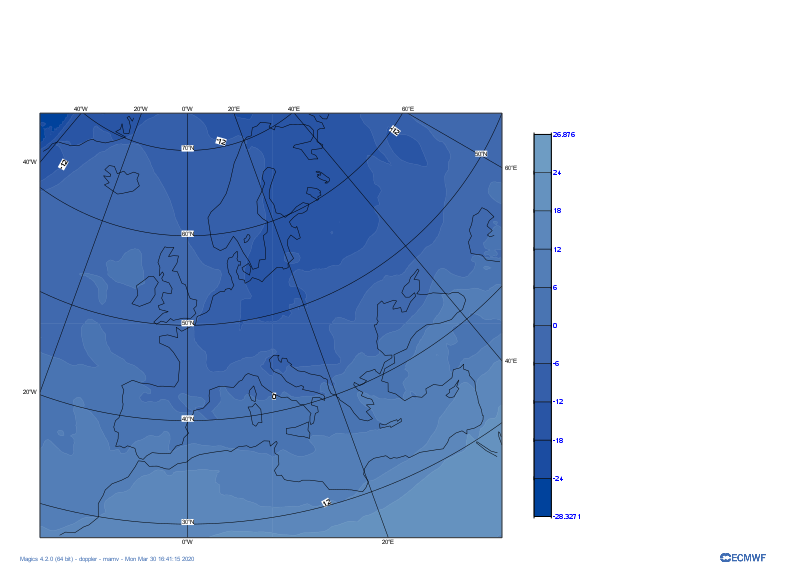

In [7]:
my_simple_contour = magics.mcont(
    legend                      = "on",
    contour                     = "off",
    contour_shade               = "on",
    contour_shade_method        = "area_fill",
    contour_shade_colour_method = 'list',
    contour_shade_colour_list   = ['#00429d', '#1b4ca2', '#2955a6', '#355fab', 
                                   '#4069af', '#4974b3', '#537eb8', '#5c88bc', 
                                   '#6593c0', '#6e9dc4', '#78a8c8', '#81b2cc', 
                                   '#8cbdd0', '#96c8d4', '#a2d2d7', '#aedcda', 
                                   '#bce7dd', '#ccf0df', '#dff9e1', '#ffffe0']
)
magics.plot(projection,t,my_simple_contour,coast,legend)

### contour_level_selection_type  <a id='contour_level_selection_type'></a>
Default: count   
Other values: interval, level_list 

**count** - you also need to set:  
contour_level_count - number of leves you wish  
contour_level_tolerance -  how strict should Magics be when settng your levels, default 2 means you'll get +-2 levels

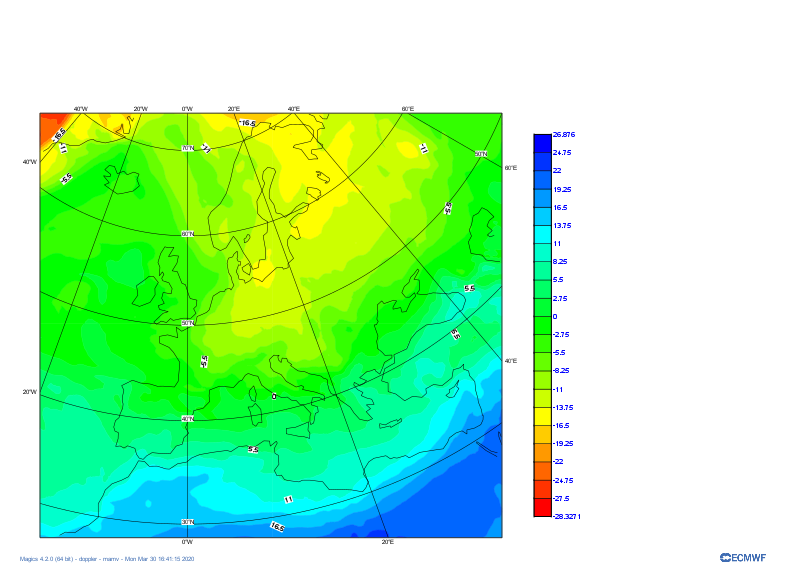

In [8]:
my_simple_contour = magics.mcont(
    legend                       = "on",
    contour                      = "off",
    contour_shade                = "on",
    contour_shade_method         = "area_fill",
    contour_level_selection_type = "count",
    contour_level_count          = 21,
    contour_level_tolerance      = 1

)
magics.plot(projection,t,my_simple_contour,coast,legend)

In [9]:
ds = xr.open_dataset('data/t850.grib',engine='cfgrib')
data_max = int(ds.t.max()-273.15)
data_min = int(ds.t.min()-273.15)
print('max = ',float(ds.t.max()-273.15),'\nmin = ', float(ds.t.min()-273.15))

max =  31.454187011718773 
min =  -39.80950012207029


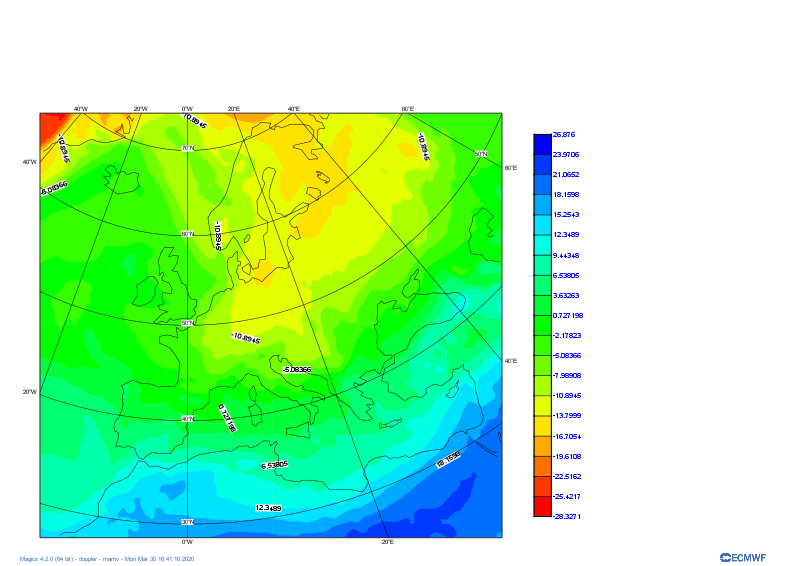

In [10]:
my_simple_contour = magics.mcont(
    legend                       = "on",
    contour                      = "off",
    contour_shade                = "on",
    contour_shade_method         = "area_fill",
    contour_level_selection_type = "count",
    contour_level_count          = 20,
    contour_level_tolerance      = 0
)
magics.plot(projection,t,my_simple_contour,coast,legend)

### min/max parameters  <a id='min_max_parameters'></a>
    contour_min_level            
    contour_max_level            
    contour_shade_min_level      
    contour_shade_max_level      

In order to force Magics to use min/max values we want, we can find those values and pass to them to Magics.  
Sometimes it will find nice levels, sometimes it wont.  
Try changing max level to 36.   
Try setting contour_level_tolerance to 0. Sometime you still can't make Magics have the number of levels you want even with this.

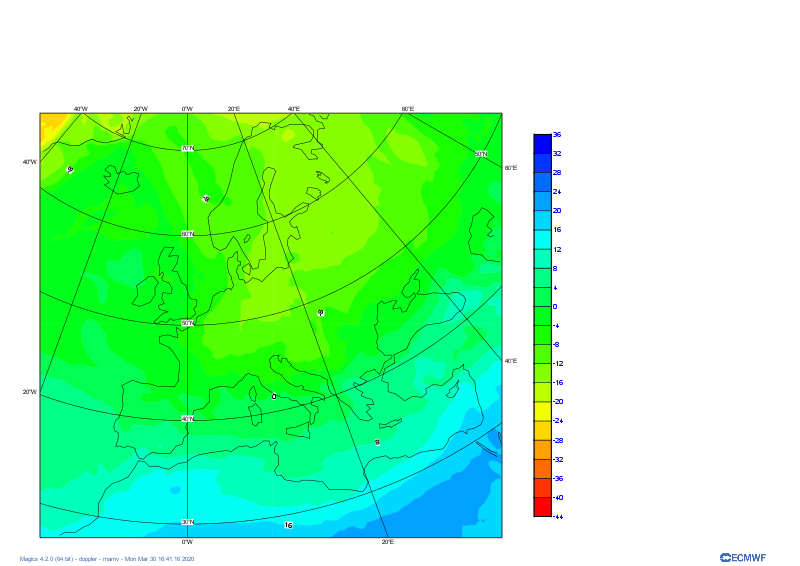

In [11]:
my_simple_contour = magics.mcont(
    legend                       = "on",
    contour                      = "off",
    contour_shade                = "on",
    contour_shade_method         = "area_fill",
    contour_level_selection_type = "count",
    contour_level_count          = 21,
    contour_level_tolerance      = 0, 
    contour_min_level            = -44,
    contour_max_level            = 36,
    contour_shade_min_level      = -44,
    contour_shade_max_level      = 36
)
magics.plot(projection,t,my_simple_contour,coast,legend)   

As a rule of thumb I'd say avoid **count** for level selection type.

### contour_level_selection_type = "interval" <a id='contour_level_selection_type_interval'></a>
    contour_interval             
    contour_reference_level      

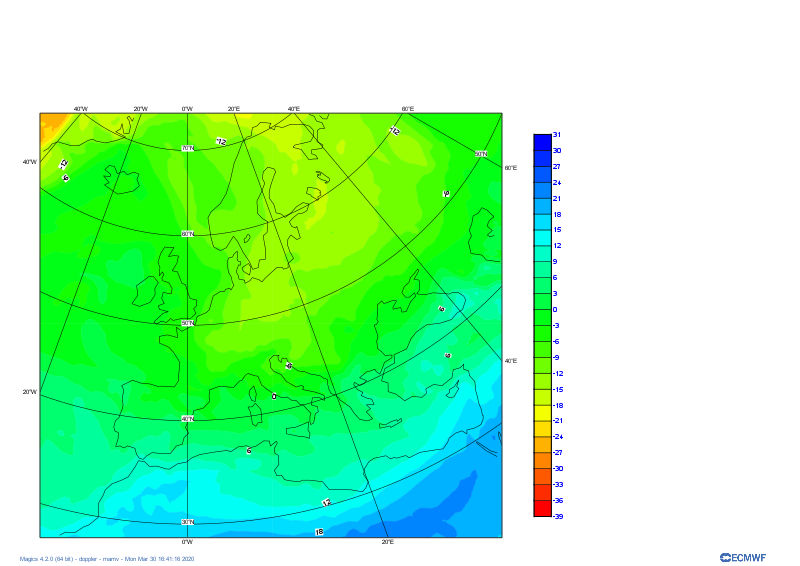

In [12]:
my_simple_contour = magics.mcont(
    legend                       = "on",
    contour                      = "off",
    contour_shade                = "on",
    contour_shade_method         = "area_fill",
    contour_level_selection_type = "interval",
    contour_interval             = 3,
    contour_reference_level      = 0,
    contour_shade_min_level      = data_min,
    contour_shade_max_level      = data_max
)
magics.plot(projection,t,my_simple_contour,coast,legend) 

### contour_interpolation_ceiling & contour_interpolation_floor <a id='interpolation_ceiling_floor'></a>

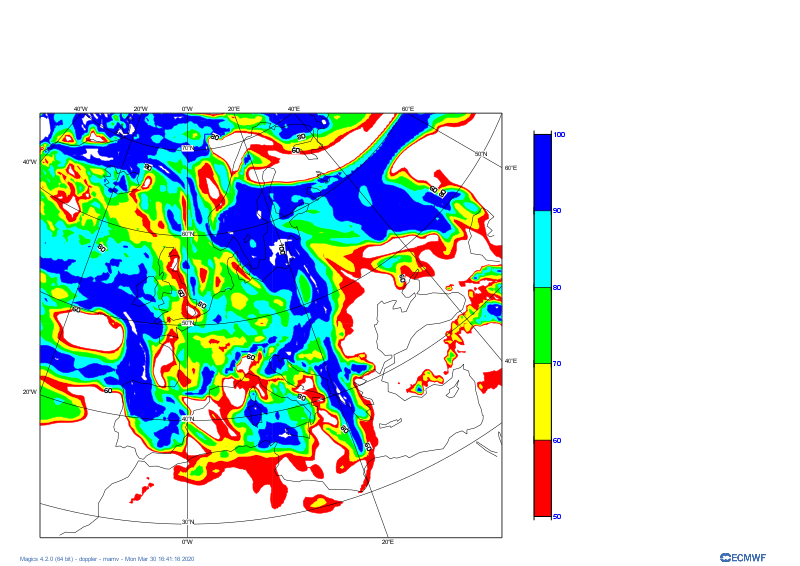

In [13]:
my_simple_contour = magics.mcont(
    legend                        = "on",
    contour                       = "off",
    contour_shade                 = "on",
    contour_shade_method          = "area_fill",
    contour_level_selection_type  = "interval",
    contour_interval              = 10,
    contour_reference_level       = 0,
    contour_shade_min_level       = 50,
    contour_shade_max_level       = 100,
    #contour_interpolation_ceiling = 99.9999
    #contour_interpolation_floor   #not using this atm
)
magics.plot(projection,rh,my_simple_contour,coast,legend) 

Last thing before we do something about the ugly colours
### contour_level_selection_type = 'level_list'
This one gives you most control, but you must know your data. Best for the data where levels we want to show are not linearly distributed (such as total precipitation for example)

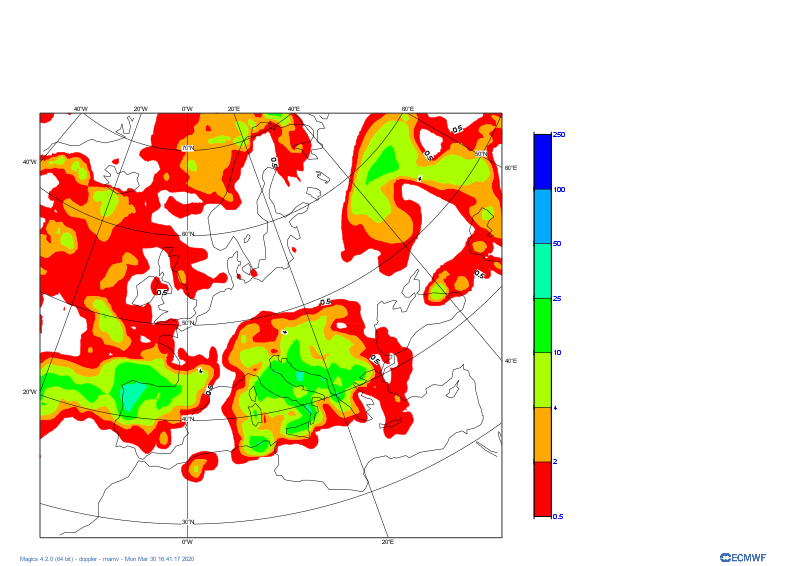

In [14]:
my_contour = magics.mcont(
    legend                        = "on",
    contour                       = "off",
    contour_shade                 = "on",
    contour_shade_method          = "area_fill",
    contour_level_selection_type  = "level_list",
    contour_level_list            = [0.5,2,4,10,25,50,100,250]
)
magics.plot(projection,tp,my_contour,coast,legend) 

### Shading!  <a id='shading'></a>

First thing **contour_shade_technique**  
Default: polygon_shading  
Other values: grid_shading, cell_shading, marker  
grid_shading - no interpolation, colours every grid point  
cell_shading - group grid points in cells - for example when resolution is too high for Magics to handle it  
    
    contour_shade_cell_resolution - Number of cells per cm  
    contour_shade_cell_method - Method of determining the colour of a cel (interpolate or nearest)  
marker - works very similar as symbol shading, just for gridded data      

**contour_shade_colour_method**  
Default: calculate - calculate colours from min to max  
Other values: list, gradients, palette  
 
### *contour_shade_colour_method = calculate*

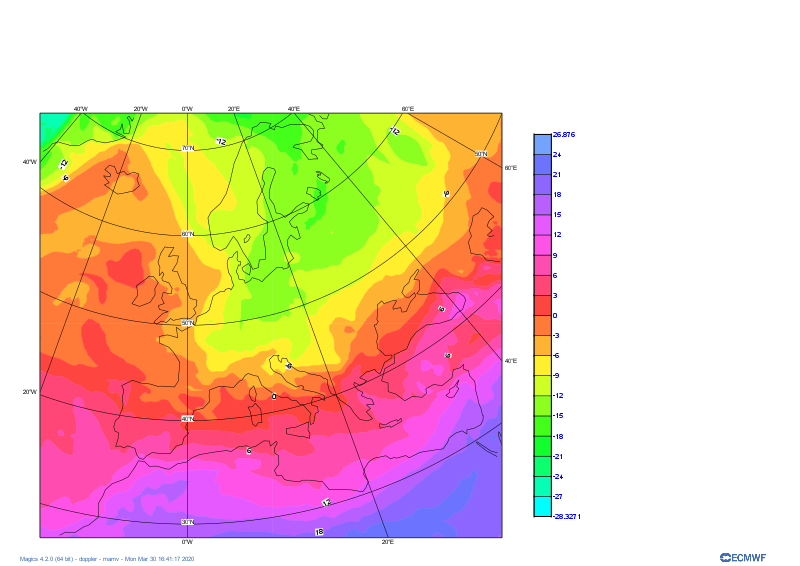

In [15]:

my_contour = magics.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_colour_method    = "calculate",
    contour_shade_max_level_colour = 'sky',
    contour_shade_min_level_colour = 'cyan',#'rgba(0,1,1,0)',
    contour_shade_colour_direction = 'clockwise',    
    contour_level_selection_type   = "interval",
    contour_interval               = 3,
    contour_reference_level        = 0
)
magics.plot(projection,t,my_contour,coast,legend) 

### *contour_shade_colour_method = list* 

If we have more levels than colours Magics will start again from the first colour.  
We could easily fix this by adding more colours, but if we don't set minimum and maximum value for colouring, we may end up with more levels on the other time step of our data.

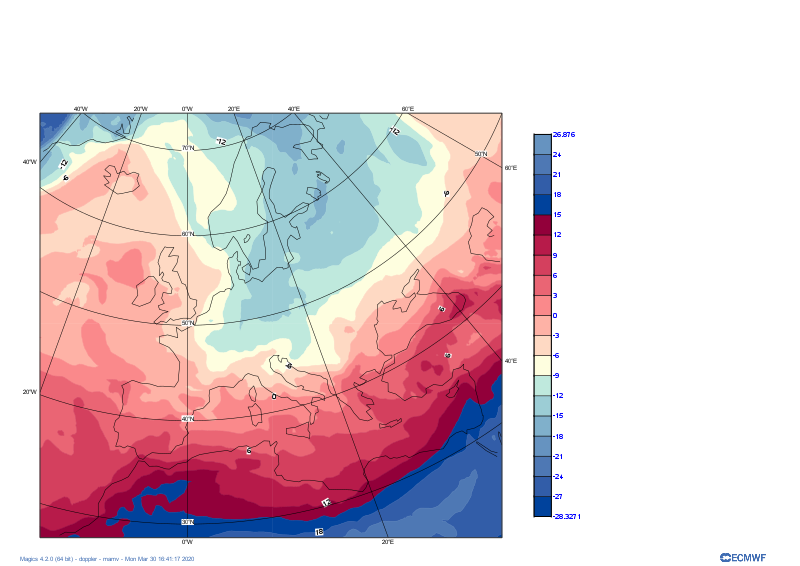

In [16]:
my_contour = magics.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_level_selection_type   = "interval",
    contour_interval               = 3,
    contour_reference_level        = 0,
    #contour_shade_max_level        = 30,
    #contour_shade_min_level        = -30,
    contour_shade_colour_method    = "list",
    contour_shade_colour_list      = ['#00429d', '#325da9', '#4e78b5', '#6694c1', '#80b1cc', 
                                      '#9dced6', '#c0eade', '#ffffe0', '#ffdac4', '#ffb3a7', 
                                      '#fb8a8c', '#eb6574', '#d5405e', '#b81b4a', '#93003a']
)
magics.plot(projection,t,my_contour,coast,legend) 

### *contour_shade_colour_method = palette* 
Magics' predefined palettes. It works exactly like lists, just the list is predefined. To find available palettes go [to the Confluence page](https://confluence.ecmwf.int/display/MAGP/Predefined+palettes+in+Magics)  
Every pallete name ends with number of colours it has. Make sure this number matches number of levels.

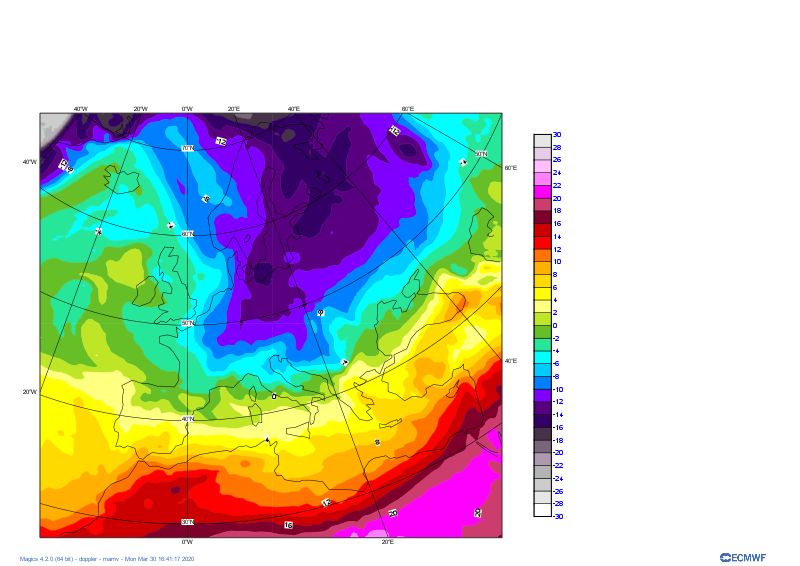

In [17]:
my_contour = magics.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_level_selection_type   = "interval",
    contour_interval               = 2,
    contour_reference_level        = 0,
    contour_shade_max_level        = 30,
    contour_shade_min_level        = -30,
    contour_shade_colour_method    = 'palette',
    contour_shade_palette_name     = 'eccharts_rainbow_white_grey_30'
)
magics.plot(projection,t,my_contour,coast,legend) 

### *contour_shade_colour_method = gradients* 
This is in separate notebook